<a href="https://colab.research.google.com/github/YaduSM001/Datascience-assignment/blob/main/Preprocessing_on_Loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing on Loan data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/train_loan_preprocess.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Missing Values Handling

In [ ]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
null_columns=df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]
null_columns

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,No,NaN,360.0,1.0
1,Male,Yes,1,No,128.0,360.0,1.0
2,Male,Yes,0,Yes,66.0,360.0,1.0
3,Male,Yes,0,No,120.0,360.0,1.0
4,Male,No,0,No,141.0,360.0,1.0
...,...,...,...,...,...,...,...
609,Female,No,0,No,71.0,360.0,1.0
610,Male,Yes,3+,No,40.0,180.0,1.0
611,Male,Yes,1,No,253.0,360.0,1.0
612,Male,Yes,2,No,187.0,360.0,1.0


In [ ]:
null_columns.isna().sum()

,0
Gender,13
Married,3
Dependents,15
Self_Employed,32
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [ ]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
null_columns=df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History']]
null_columns.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Self_Employed,32
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['Dependents'] = imputer.fit_transform(df[['Dependents']]).ravel()
df['Gender'] = imputer.fit_transform(df[['Gender']]).ravel()
df['Married'] = imputer.fit_transform(df[['Married']]).ravel()
df['Self_Employed'] = imputer.fit_transform(df[['Self_Employed']]).ravel()

In [ ]:
null_columns=df[['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History']]
null_columns.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Self_Employed,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


## Outliers

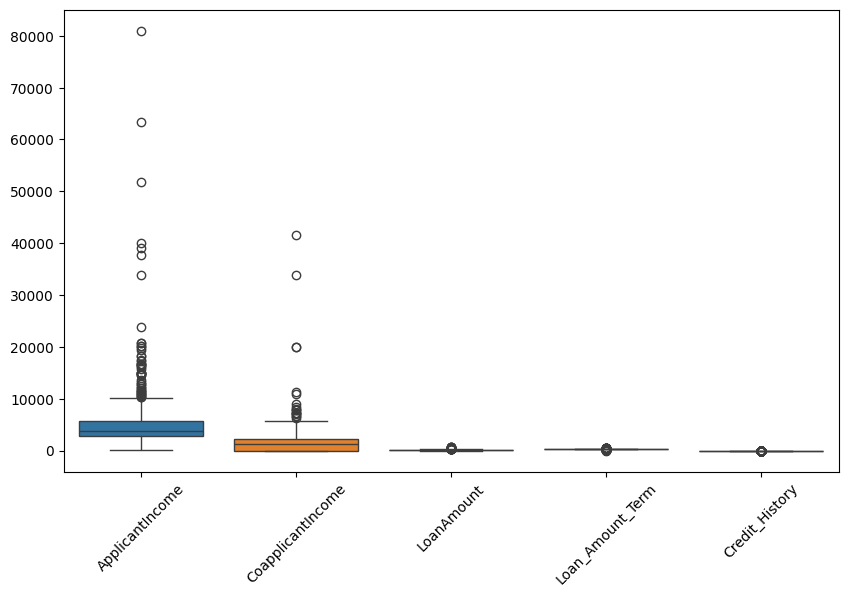

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
def detect_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers
for col in df.select_dtypes(include=np.number).columns:
  outliers = detect_outliers_iqr(df[col])
  print(f"Outliers in {col}: {outliers}")
for col in df.select_dtypes(include=np.number).columns:
  outliers = detect_outliers_iqr(df[col])
  median = df[col].median()
  df[col] = np.where(df[col].isin(outliers), median, df[col])

Outliers in ApplicantIncome: 9      12841.0
34     12500.0
54     11500.0
67     10750.0
102    13650.0
106    11417.0
115    14583.0
119    10408.0
126    23803.0
128    10513.0
130    20166.0
138    14999.0
144    11757.0
146    14866.0
155    39999.0
171    51763.0
183    33846.0
185    39147.0
191    12000.0
199    11000.0
254    16250.0
258    14683.0
271    11146.0
278    14583.0
284    20667.0
308    20233.0
324    15000.0
333    63337.0
369    19730.0
370    15759.0
409    81000.0
424    14880.0
432    12876.0
438    10416.0
443    37719.0
467    16692.0
475    16525.0
478    16667.0
483    10833.0
487    18333.0
493    17263.0
506    20833.0
509    13262.0
525    17500.0
533    11250.0
534    18165.0
561    19484.0
572    16666.0
594    16120.0
604    12000.0
Name: ApplicantIncome, dtype: float64
Outliers in CoapplicantIncome: 9      10968.0
12      8106.0
38      7210.0
122     8980.0
135     7750.0
177    11300.0
180     7250.0
253     7101.0
349     6250.0
372     7873.0
40

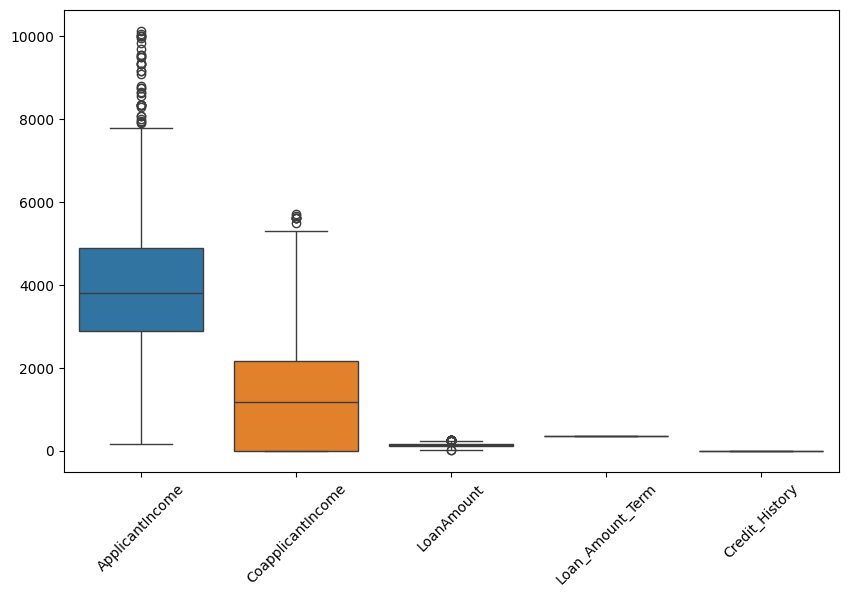

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_ID']=le.fit_transform(df['Loan_ID'])
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Education']=le.fit_transform(df['Education'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.570528,0.000000,0.547459,0.0,0.0,2,1
1,1,1,1,1,0,0,0.443788,0.264515,0.474104,0.0,0.0,0,0
2,2,1,1,0,0,1,0.285314,0.000000,0.227092,0.0,0.0,2,1
3,3,1,1,0,1,0,0.243568,0.413612,0.442231,0.0,0.0,2,1
4,4,1,0,0,0,0,0.585644,0.000000,0.525896,0.0,0.0,2,1


## Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

scaler = MinMaxScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df.head())

   Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0        0       1        0          0          0              0   
1        1       1        1          1          0              0   
2        2       1        1          0          0              1   
3        3       1        1          0          1              0   
4        4       1        0          0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.570528           0.000000    0.547459               0.0   
1         0.443788           0.264515    0.474104               0.0   
2         0.285314           0.000000    0.227092               0.0   
3         0.243568           0.413612    0.442231               0.0   
4         0.585644           0.000000    0.525896               0.0   

   Credit_History  Property_Area  Loan_Status  
0             0.0              2            1  
1             0.0              0            0  
2             0.0   